# Implementation of Age Detection





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing require packages/libraries also need to install it using requirements.txt file

In [ ]:
# picture = "/content/drive/My Drive/regress.PNG"
# from IPython.display import Image
# Image(picture, width=220)

# Model design flowchart
# !pip install numpy --upgrade
# !pip install pandas --upgrade
# !pip install np_utils
#conda install -c apple tensorflow-deps
#pip install tensorflow-macos
#pip install tensorflow-metal
#pip install tensorflow
#pip install -U scikit-learn
import sys

import keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Linux-6.1.58+-x86_64-with-glibc2.35
Tensor Flow Version: 2.15.0
Keras Version: 2.15.0

Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Pandas 1.5.3
Scikit-Learn 1.2.2
SciPy 1.11.4
GPU is available


In [ ]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import applications,activations
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras import optimizers,utils
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization,ZeroPadding2D
from keras.layers import Convolution2D, Activation,MaxPooling2D
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras.models import load_model

In [ ]:
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki.tar.gz /content/


--2024-02-20 00:21:56--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3157487479 (2.9G) [application/x-gzip]
Saving to: ‘wiki.tar.gz’

wiki.tar.gz         100%[===================>]   2.94G  18.1MB/s    in 2m 56s  

2024-02-20 00:24:52 (17.1 MB/s) - ‘wiki.tar.gz’ saved [3157487479/3157487479]

/content/: Scheme missing.
FINISHED --2024-02-20 00:24:52--
Total wall clock time: 2m 57s
Downloaded: 1 files, 2.9G in 2m 56s (17.1 MB/s)


In [ ]:
!tar -xzvf "/content/wiki.tar.gz" -C "/content/"

Streaming output truncated to the last 5000 lines.
wiki/50/8653450_1985-11-28_2014.jpg
wiki/50/28040650_1986-04-20_2011.jpg
wiki/50/1896450_1928-03-22_1990.jpg
wiki/50/39477450_1965-01-04_2014.jpg
wiki/50/17106250_1950-02-23_2010.jpg
wiki/50/17508150_1986-04-22_2012.jpg
wiki/50/15701850_1986-04-15_2010.jpg
wiki/50/28037450_1934-07-09_2002.jpg
wiki/50/14040750_1989-10-04_2008.jpg
wiki/50/28991050_1964-08-19_2010.jpg
wiki/50/27962750_1894-03-20_1946.jpg
wiki/50/29127850_1923-11-05_2007.jpg
wiki/50/33309450_1989-04-27_2012.jpg
wiki/50/20291650_1987-02-18_2014.jpg
wiki/50/2529850_1922-12-05_1966.jpg
wiki/50/42305150_1954-07-11_1950.jpg
wiki/50/22659150_1890-11-01_1962.jpg
wiki/50/29569950_1978-04-28_1999.jpg
wiki/50/7720450_1956-07-18_2010.jpg
wiki/50/7973150_1985-10-07_2009.jpg
wiki/50/2744250_1981-01-17_2010.jpg
wiki/50/166450_1927-06-15_1989.jpg
wiki/50/35796450_1936-01-21_1973.jpg
wiki/50/43761250_1941-04-20_1960.jpg
wiki/50/38389550_1970-03-25_1996.jpg
wiki/50/683150_1986-06-27_2007.j

## Data Collection and Transforamtion from mat file to dataframe

In [ ]:
# Reading Matlab files with SciPy
mat = scipy.io.loadmat('/content/wiki/wiki.mat')

In [ ]:
 # Matlab file
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 '__globals__': [],
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
                 array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
                 array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
                 array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
                 array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
                 array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
               dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
                 array(['Dettmar Cramer'], dtype='<U14'),
                 array(['Marc Okrand'], dtype='<U11'), ...,
                 arr

In [ ]:
# Converting into pandas dataframe. Always easier and better to deal with

instances = mat['wiki'][0][0][0].shape[1]

columns = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score"]

df = pd.DataFrame(index = range(0,instances), columns = columns)

for i in mat:
    if i == "wiki":
        current_array = mat[i][0][0]

for j in range(len(current_array)):
    df[columns[j]] = pd.DataFrame(current_array[j][0])

In [ ]:
 # Lets see how exactly our dataset looks
df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62328 entries, 0 to 62327
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dob                62328 non-null  int32  
 1   photo_taken        62328 non-null  uint16 
 2   full_path          62328 non-null  object 
 3   gender             59685 non-null  float64
 4   name               62328 non-null  object 
 5   face_location      62328 non-null  object 
 6   face_score         62328 non-null  float64
 7   second_face_score  4096 non-null   float64
dtypes: float64(3), int32(1), object(3), uint16(1)
memory usage: 3.2+ MB


## Data Cleaning and Preprocessing

In [ ]:
#Extracting  Year from DOB
from datetime import datetime, timedelta
def datenum_to_datetime(datenum):
    days = datenum % 1
    hours = days % 1 * 24
    minutes = hours % 1 * 60
    seconds = minutes % 1 * 60
    exact_date = datetime.fromordinal(int(datenum)) + timedelta(days=int(days)) + timedelta(hours=int(hours)) \
    + timedelta(minutes=int(minutes)) + timedelta(seconds=round(seconds)) - timedelta(days=366)

    return exact_date.year

df['date_of_birth'] = df['dob'].apply(datenum_to_datetime)

In [ ]:
# Getting present age from dob and photo taken col
df['age'] = df['photo_taken'] - df['date_of_birth']

In [ ]:
df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,date_of_birth,age
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN,1981,28
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248,1925,39
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN,1948,60
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN,1930,31
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN,1971,41


In [ ]:
#remove pictures does not include face
df = df[df['face_score'] != -np.inf]

#some pictures include more than one face, remove them
df = df[df['second_face_score'].isna()]

#some guys seem to be greater than 100. Let's remove them and first make a model that classifies from 1 to 100
df = df[df['age'] <= 100]

#some guys seem to be unborn in the data set i.e age < 0
df = df[df['age'] > 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40157 entries, 0 to 62327
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dob                40157 non-null  int32  
 1   photo_taken        40157 non-null  uint16 
 2   full_path          40157 non-null  object 
 3   gender             39397 non-null  float64
 4   name               40157 non-null  object 
 5   face_location      40157 non-null  object 
 6   face_score         40157 non-null  float64
 7   second_face_score  0 non-null      float64
 8   date_of_birth      40157 non-null  int64  
 9   age                40157 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(3), uint16(1)
memory usage: 3.0+ MB


In [ ]:
# Lower threshold for face_score - allows more images of poor quality (making the model more robust)

df = df[df['face_score'] >= 1.75]
df = df.drop(columns = ['name','face_score','second_face_score','date_of_birth','face_location'])

In [ ]:
df.info()     # Only gender has null values. Since, this project deals with age estimation
              # only, we needn't worry about those. We would anyways be dropping gender
              # column after EDA (or at least won't be feeding it to the model)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34200 entries, 0 to 62327
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dob          34200 non-null  int32  
 1   photo_taken  34200 non-null  uint16 
 2   full_path    34200 non-null  object 
 3   gender       33550 non-null  float64
 4   age          34200 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(1), uint16(1)
memory usage: 1.2+ MB


In [ ]:
# GENDER: 0 - female , 1-male , NaN - unknown
df.head()

,dob,photo_taken,full_path,gender,age
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,28
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,60
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,41
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,52
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,34


In [ ]:
df.describe()

,dob,photo_taken,gender,age
count,34200.000000,34200.000000,33550.000000,34200.000000
mean,717156.505731,2001.503012,0.740447,38.492661
std,9180.800332,19.586437,0.438396,16.469871
min,677987.000000,1940.000000,0.000000,1.000000
25%,711082.000000,2006.000000,0.000000,26.000000
50%,719659.500000,2010.000000,1.000000,33.000000
75%,724768.250000,2013.000000,1.000000,49.000000
max,734922.000000,2015.000000,1.000000,100.000000


In [ ]:
df['path'] = [str('/content/wiki/')+str(np.squeeze(i)) for i in df['full_path']]
#df['path'] = [str(np.squeeze(i)) for i in df['full_path']]
df

,dob,photo_taken,full_path,gender,age,path
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,28,/content/wiki/17/10000217_1981-05-05_2009.jpg
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,60,/content/wiki/12/100012_1948-07-03_2008.jpg
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,41,/content/wiki/16/10002116_1971-05-31_2012.jpg
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,52,/content/wiki/02/10002702_1960-11-09_2012.jpg
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,34,/content/wiki/41/10003541_1937-09-27_1971.jpg
...,...,...,...,...,...,...
62321,707521,1968,[38/9996938_1937-02-15_1968.jpg],1.0,31,/content/wiki/38/9996938_1937-02-15_1968.jpg
62322,709971,1968,[46/9996946_1943-11-01_1968.jpg],1.0,25,/content/wiki/46/9996946_1943-11-01_1968.jpg
62323,707582,1963,[49/9996949_1937-04-17_1963.jpg],1.0,26,/content/wiki/49/9996949_1937-04-17_1963.jpg
62325,720620,2013,[09/9998109_1972-12-27_2013.jpg],1.0,41,/content/wiki/09/9998109_1972-12-27_2013.jpg


## EDA (Exploratory Data Analysis)

After looking at all data and their datatypes and cleaning the data, to get relevant columns,  lets analyze the data and its distribution, for better understanding of dataset.

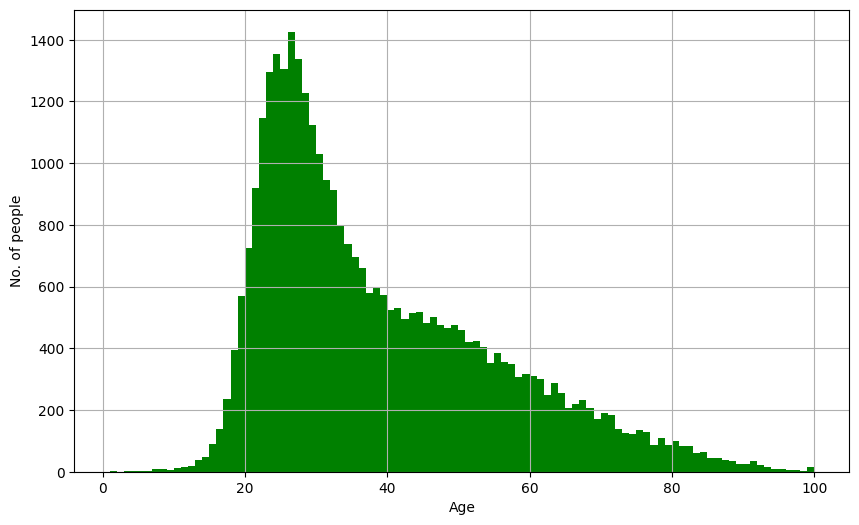

In [ ]:
#Distibution of number of people based on ages
df['age'].hist(bins=df['age'].nunique(),color='g',figsize=(10,6))

plt.xlabel('Age')
plt.ylabel('No. of people')
plt.show()

we can see that a large chunk of population in training data is from 20 to 60. Sort of bell-shaped curve Gaussian Distribution -very non uniform.

Mean age is 38.492

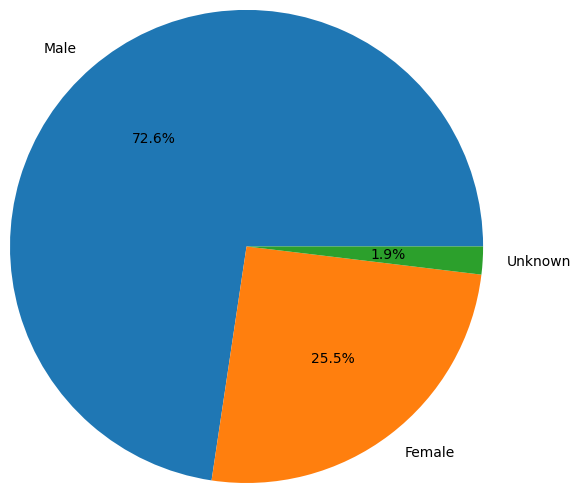

In [ ]:
#Gender wise distribution
x1 = df[df['gender']==1]['gender'].count()
x2 = df[df['gender']==0]['gender'].count()
inp = [x1,x2,650]
lab = ['Male', 'Female', 'Unknown']

plt.pie(inp, labels=lab,radius=1.6,autopct='%.1f%%')
plt.show()

# Clearly, the dataset is heavily imbalanced in favour of males

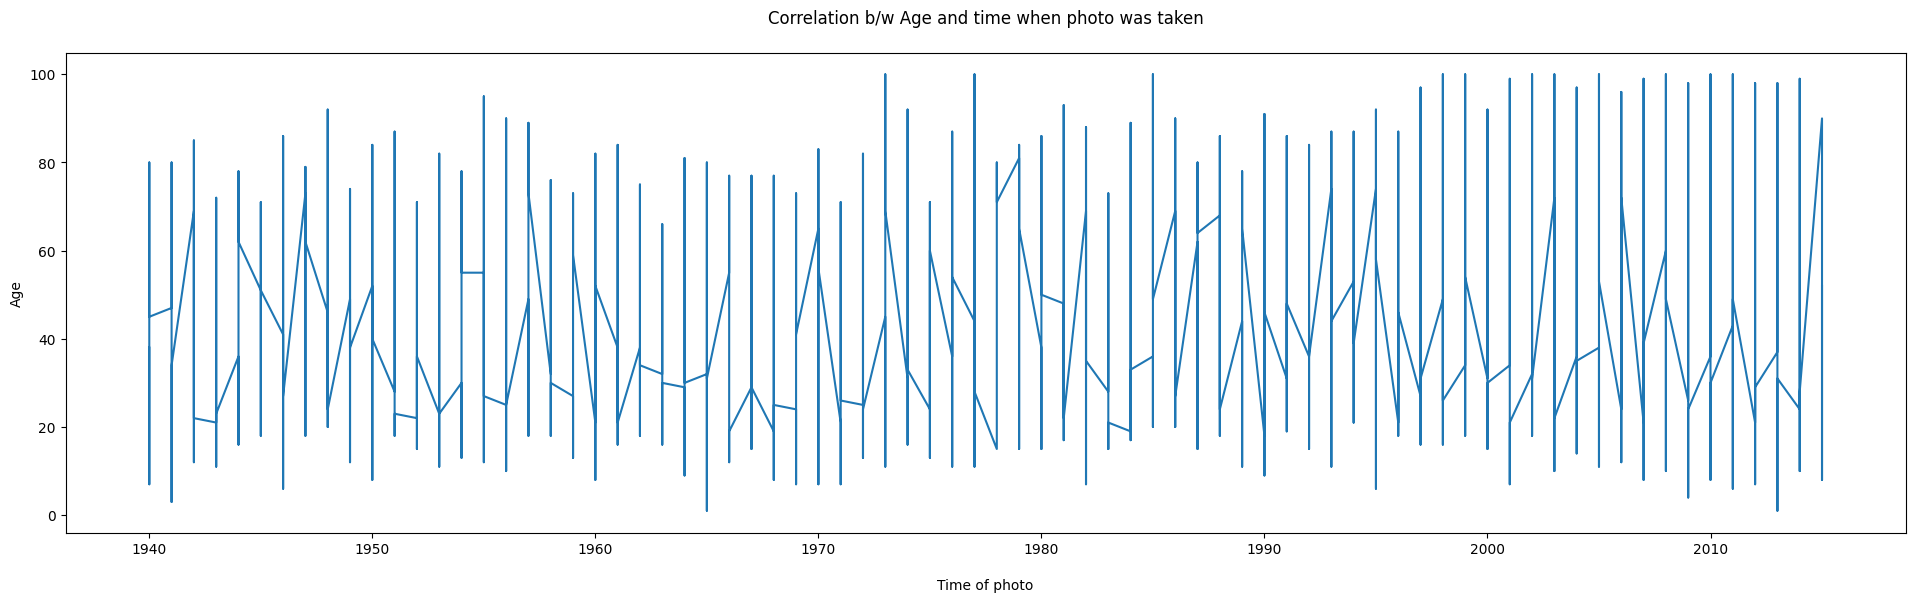

In [ ]:
# Analysis for Correlation b/w Age and time when photo was taken
x = df.sort_values(by='photo_taken')
fig= plt.figure(figsize=(23,6))                        # width and height of plot in unit inches
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(x['photo_taken'],x['age'])
plt.title('Correlation b/w Age and time when photo was taken\n')
plt.xlabel('\nTime of photo')
plt.ylabel('Age')
plt.show()

# Shows that irrespective of when photo was taken, almost always ppl between 20-70 have been covered.


### Pixel based EDA on images

EDA of pixels in images can provide valuable insights and help you make informed decisions throughout the model development process, ultimately leading to better performance and generalization of your age classification model. EDA can help you check the quality of your image data, such as checking for corrupted images, images with low resolution, or images with incorrect labels. This can ensure that your dataset is clean and suitable for training a model.

Now, we will do pixel analysis of provided data. The value of a pixel at any point correspond to the intensity of the light photons striking at that point.**The range of pixel intensity varies from 0 (black) to 255 (white).**

Color images require more storage space than grayscale images. Pixels in grayscale images need just one byte to indicate the intensity of gray needed to render the pixel on screen. It turns out that any color can be built using the correct combination of red, green, and blue.
* Thus, pixels in color images are represented by three values (r,g,b). The values indicate the intensity of red, green, and blue, respectively, needed to render the pixel on screen.

*  The range of intensities is exactly the same as grayscale images - 0 means none of the color appears in the pixel and 255 indicates the highest level of the color is evident in the pixel. For example, the triple (128, 0, 128) would represent a medium purple while (255, 215, 0) represents gold.

By using grayscale images can reduce the complexity of your model and help prevent overfitting in our age estimation project

In [ ]:
# For further EDA on images itself, we need to extract their pixel values. These pixel values won't have any use other than in EDA

target_size = (198, 198)

def get_image_pixel(image_path):
    pic = load_img("/Users/rachana/Rachana_Python_VS/age_gender/wiki/%s" % image_path[0], target_size=target_size)
    x = img_to_array(pic).reshape(1, -1)[0]
    return x

#df['pixels'] = df['full_path'].apply(get_image_pixel)

* Keras provides the `load_img()` function for loading an image from file as a
PIL image object.

The `load_img()` function provides additional arguments that may be useful when loading the image, such as **grayscale** that allows the image to be loaded in grayscale (defaults to False), **color_mode** that allows the image mode or channel format to be specified (defaults to rgb), and **target_size** that allows a tuple of (height, width) to be specified, resizing the image automatically after being loaded.


* Keras provides the `img_to_array()` function for converting a loaded image in PIL format into a NumPy array for use with deep learning models.

The numpy array essentially is the  pixel data.

In [ ]:
df.head()

,dob,photo_taken,full_path,gender,age,path
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,28,/content/wiki/17/10000217_1981-05-05_2009.jpg
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,60,/content/wiki/12/100012_1948-07-03_2008.jpg
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,41,/content/wiki/16/10002116_1971-05-31_2012.jpg
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,52,/content/wiki/02/10002702_1960-11-09_2012.jpg
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,34,/content/wiki/41/10003541_1937-09-27_1971.jpg


In [ ]:
# x = df['age']
# x = x.sort_values()
# x.unique()

In [ ]:
# # Each image now is 198 x 198 x 1. Hence has 39204 pixels (NumPy array)
# df['pixels'][0].shape



In [ ]:
# # Here, we get the average pixel value for every image

# x = df.sort_values(by='age')
# x.reset_index(inplace=True)

# x['pixel_per_image'] = x['pixels']
# x['pixel_deviation_per_image'] = x['pixels']

# for i in range(34200):
#   x['pixel_per_image'][i] = x['pixels'][i].mean()
#   x['pixel_deviation_per_image'][i] = x['pixels'][i].max()-x['pixels'][i].min()

# x.head()

First, let's analyse average pixel values per image. We wanna find out whether it has any correlation to gender of the person in the image.

In [ ]:
# print(x['pixel_per_image'].min())

# print(x['pixel_per_image'].max())

# print(x['pixel_per_image'].mean())     # Average pixel value across all images

In [ ]:
# sns.stripplot(x='gender', y='pixel_per_image', data=x, alpha=0.3, jitter=True);

# # There seems no correlation b/w gender and mean_pixel value as such. To confirm, let's just check the mean pixel value for male and     female and try to plot their distribution to see amt of overlap

In [ ]:
# print(x[x['gender']==1]['index'].count())      # male count
# print(x[x['gender']==0]['index'].count())      # female count

In [ ]:
# sum1=0
# sum2=0
# for i in range(34200):
#     if x['gender'][i]==1:
#         sum1+=x['pixel_per_image'][i]

#     elif x['gender'][i]==0:
#         sum2+=x['pixel_per_image'][i]

# val1 = sum1/24842                 # Avg pixel value for male
# val2 = sum2/8708                  # Avg pixel value for female

# print(val1,' ',val2)              # Mean pixel val for male and female

The extent of overlap, confirms in our mind that there is no correlation between pixel values and gender ! Lets, now combine age, gender and average pixel value in a image.

In [ ]:
# sns.lmplot(x='age', y='pixel_per_image', hue='gender', data=x, fit_reg=False, scatter_kws={'alpha':0.5})
# plt.title('Avg pixel value in an image vs Age\n')
# plt.show()

deviation in pixel values (max-min) in an image

In [ ]:
# print(x['pixel_deviation_per_image'].min())

# print(x['pixel_deviation_per_image'].max())

# print(x['pixel_deviation_per_image'].mean())             # Average pixel deviation across all images

In [ ]:
#creating classes for age column as would like to create age estimation through classification

df['age'] = df['age']//25

''' This basically makes 5 divisions in age-groups -
1. 0-24
2. 25-49
3. 50-74
4. 75-99
5. 100-124 '''

' This basically makes 5 divisions in age-groups -\n1. 0-24\n2. 25-49\n3. 50-74\n4. 75-99\n5. 100-124 '

In [ ]:
x = (df.age==0).sum()
y = (df.age==1).sum()
z = (df.age==2).sum()
a = (df.age==3).sum()
b = (df.age==4).sum()
c = (df.age==5).sum()

print(x,' ',y,' ',z,' ',a,' ',b, ' ',c)

7033   18929   6973   1253   12   0


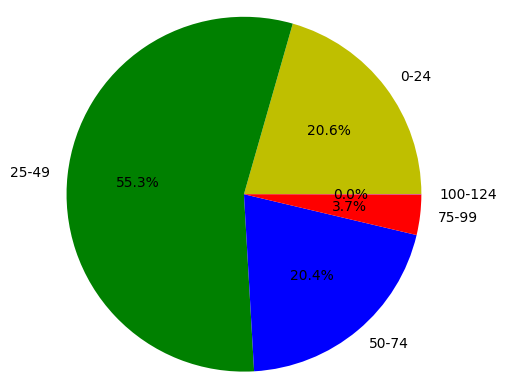

In [ ]:
#visualize group wise data distribution

age = [x,y,z,a,b]
labels = ['0-24','25-49','50-74','75-99','100-124']
colors = [ 'y', 'g','b','r','m']
plt.pie(age,labels = labels,colors = colors,radius=1.2,autopct='%.1f%%')
plt.show()

In [ ]:
df.head()

,dob,photo_taken,full_path,gender,age,path
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,1,/content/wiki/17/10000217_1981-05-05_2009.jpg
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,2,/content/wiki/12/100012_1948-07-03_2008.jpg
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,1,/content/wiki/16/10002116_1971-05-31_2012.jpg
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,2,/content/wiki/02/10002702_1960-11-09_2012.jpg
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,1,/content/wiki/41/10003541_1937-09-27_1971.jpg


## Image Data Generator

Image Data Generator is used to artificially expand a dataset by creating modified versions of images or other data points.It is a powerful technique that can help improve the performance, generalization, and robustness of machine learning models

**Note: Only augment images in train set. Validation/test set images must not be augmented.**

In [ ]:
df['age'] = df['age'].astype(str)

In [ ]:

# Split the DataFrame into train and test
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Create an ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from DataFrame for training
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='path',
    y_col='age',
    target_size=(198, 198),
    batch_size=64,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=True
)

# Flow from DataFrame for testing
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='path',
    y_col='age',
    target_size=(198, 198),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Check the sizes of the datasets
print("Train set size:", len(train))

print("Test set size:", len(test))



Found 27360 validated image filenames belonging to 5 classes.
Found 6840 validated image filenames belonging to 5 classes.
Train set size: 27360
Test set size: 6840


## Model Architecture
Age estimation is a classification problem in our case as we have devided the numbers in 5 classes, but if there is number as one class then its regression problem



Convolutional neural networks work on 2 assumptions -

1. Low level features are local
2. What's useful in one place will also be useful in other places.

Kernel size should be determined by how strongly we believe in those assumptions for the problem at hand. In general, smaller filters are considered better than larger filter sizes. Also, usually -

* Number of filters tend to increase with depth of model (more representational capacity is required in the model)

* Size of filters is almost always odd. Like 3x3, 5x5
* Filter size tends to decrease with depth of the model (initial layers have larger receptive fields).

### Define the Model

In [ ]:
# Define a CNN model with dropout and regularization
model = models.Sequential([
    layers.Conv2D(64,   (3, 3), activation='relu', input_shape=(198, 198, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.3),  # Reduced dropout rate
    layers.Dense(256, kernel_regularizer=l2(0.01),activation='relu',),
    layers.Dropout(0.3),  # Reduced dropout rate
    layers.Dense(128, kernel_regularizer=l2(0.01), activation='relu'),
    layers.Dropout(0.3),  # Reduced dropout rate
    layers.Dense(5, activation='softmax')
])

### Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# convert class labels to on-hot encoding# conve
from keras.utils import to_categorical
Y = to_categorical(np.array(df['age']) ,5)

### Train the Model

In [ ]:
# # Add early stopping and model checkpoint callbacks
# early_stopping = callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=3,
#     restore_best_weights=True
# )


In [ ]:
from keras import callbacks
filename='/content/drive/MyDrive/Rachana/model/model_train_new.csv'
filepath="/content/drive/MyDrive/Rachana/model/best_model.h5"
# Creating a TensorBoard callback object and saving it at the desired location.

tensorboard = TensorBoard(log_dir=f"/content/drive/MyDrive/Rachana/model/tensorboard")

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=200,
    validation_data=test_generator,
    callbacks=[ checkpoint,tensorboard]
)


Epoch 1/200
291/428 [===================>..........] - ETA: 1:22 - loss: 2.5359 - accuracy: 0.5460

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


428/428 [==============================] - ETA: 0s - loss: 2.0971 - accuracy: 0.5468
Epoch 1: val_loss improved from inf to 1.13796, saving model to /content/drive/MyDrive/Rachana/model/best_model.h5
428/428 [==============================] - 288s 646ms/step - loss: 2.0971 - accuracy: 0.5468 - val_loss: 1.1380 - val_accuracy: 0.5550
Epoch 2/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


428/428 [==============================] - ETA: 0s - loss: 1.1239 - accuracy: 0.5531
Epoch 2: val_loss improved from 1.13796 to 1.09665, saving model to /content/drive/MyDrive/Rachana/model/best_model.h5
428/428 [==============================] - 274s 640ms/step - loss: 1.1239 - accuracy: 0.5531 - val_loss: 1.0967 - val_accuracy: 0.5550
Epoch 3/200
428/428 [==============================] - ETA: 0s - loss: 1.0946 - accuracy: 0.5530
Epoch 3: val_loss improved from 1.09665 to 1.06433, saving model to /content/drive/MyDrive/Rachana/model/best_model.h5
428/428 [==============================] - 273s 637ms/step - loss: 1.0946 - accuracy: 0.5530 - val_loss: 1.0643 - val_accuracy: 0.5550
Epoch 4/200
428/428 [==============================] - ETA: 0s - loss: 1.0823 - accuracy: 0.5526
Epoch 4: val_loss improved from 1.06433 to 1.06332, saving model to /content/drive/MyDrive/Rachana/model/best_model.h5
428/428 [==============================] - 271s 633ms/step - loss: 1.0823 - accuracy: 0.5526 -

In [ ]:
# Saving the model as a h5 file for possible use later.

model.save(f"/content/drive/MyDrive/Rachana/model/accuracy_bestmodel.h5", save_format='h5')

### Evaluate the Model

In [ ]:
# Checking the train and test loss and accuracy values from the neural network above.

train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

AttributeError: 'list' object has no attribute 'iloc'

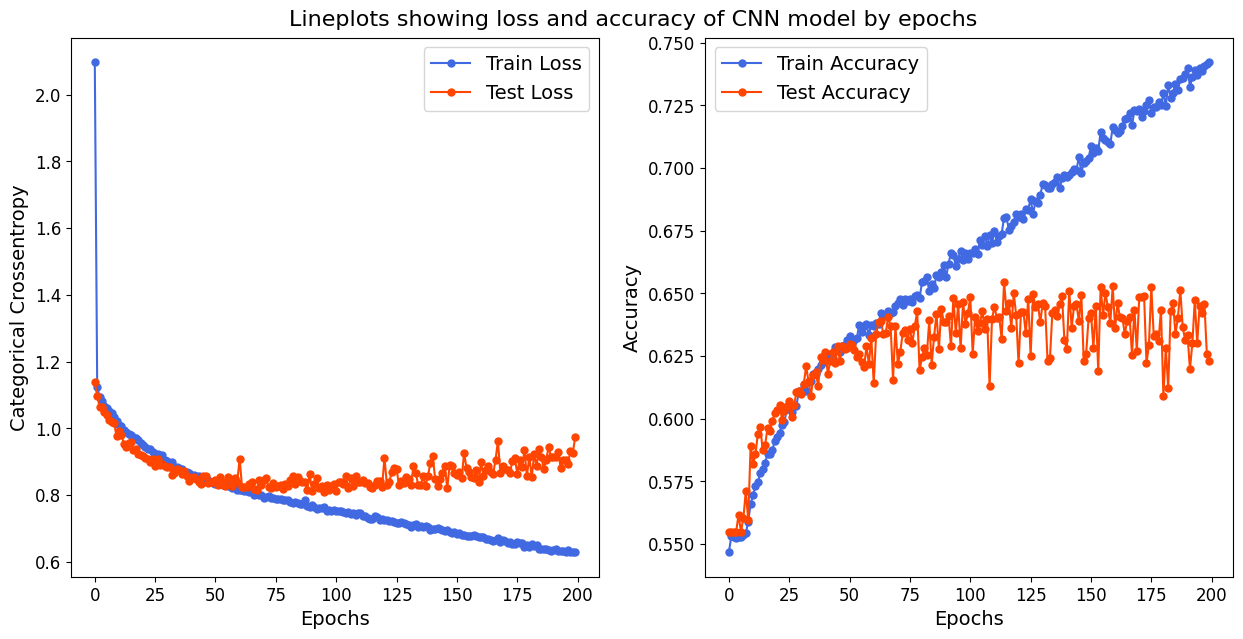

In [ ]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

# Exporting plot image in PNG format.
plt.savefig('/content/drive/MyDrive/Rachana/model/v2_final_cnn_loss_accuracy.png', bbox_inches='tight');

In [ ]:

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

# Get predictions
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_generator.classes


107/107 [==============================] - 17s 159ms/step - loss: 0.9736 - accuracy: 0.6231
Test loss: 0.9735797047615051, Test accuracy: 0.6230993866920471
107/107 [==============================] - 17s 156ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

Confusion Matrix:
[[ 666  717   33    1    0]
 [ 703 2676  416    1    0]
 [  27  416  807  128    0]
 [   4   19  111  113    0]
 [   0    1    0    1    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.47      0.47      1417
           1       0.70      0.70      0.70      3796
           2       0.59      0.59      0.59      1378
           3       0.46      0.46      0.46       247
           4       0.00      0.00      0.00         2

    accuracy                           0.62      6840
   macro avg       0.45      0.44      0.44      6840
weighted avg       0.62      0.62      0.62      6840



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Some key points to remember


*   **ModelCheckpoint** - ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved. This is very essential as DL models can take upto days to train. By default - it's NULL.

    By keeping the filename constant throughout training, we ensure that only the best model weights remain in the file uptill the point we have trained.   
To load weights - `model.load_weights(filepath)`

---



*  **Fit function** -  In the latest version of TF - 2.2.0v (released May 2020), the *fit* function has replaced the *fit_generator* function present before.

---


*  **Validation while training** - All the VALIDATION things, in the *fit* function are related to data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data

---

*   **Loss functions** ( `binary_crossentropy` vs `categorical_crossentropy`) -

  -- For `binary_crossentropy`, sigmoid activation, scalar target

  -- For `categorical_crossentropy`, softmax activation, one-hot encoded target

---

*  **LearningRateSchedular Callback** - The LearningRateScheduler callback allows us to define a function to call that takes the epoch number as an argument and returns the learning rate to use in optimizer. When used, the learning rate specified by optimizer is ignored.









Clearly, there is still lot of scope for improvement - no saturation in performance yet. Both val & train performance seems to be improving in *mae*, *mse*.
Let's train some more

Now the performance, seems to be fairly saturating. Let's try to train some more and see what happens.

Hardly any increase in performance ! HANG ON.

 `Why was always validation performance better than training performance ??`

That's because, recall that we did heavy augmentation in training dataset, so that model never sees the same image twice. The augmented images initially make it difficult for the model to learn, but are very beneficial in the long run. They improve the model's generalization ability (ability to be more robust and the make accurate predictions on unseen images/data).There was no augmentation in validation set at all. Obviously model sees the same image multiple times over all these epochs during the validation process.

## Age Estimation based on Provided Image

1/1 [==============================] - 2s 2s/step


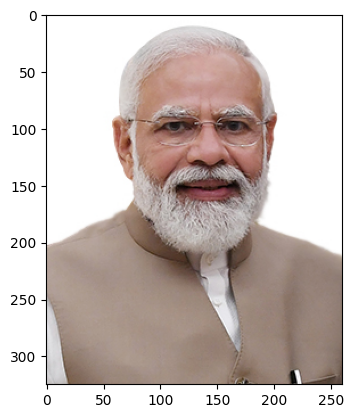

50-74 yrs old


In [ ]:

new_model = load_model('/content/drive/MyDrive/Rachana/model/accuracy_bestmodel.h5')

def loadImage(filepath):
  test_img = image.load_img(filepath, target_size=(198, 198))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

picture = "/content/drive/MyDrive/Rachana/modi_72.png"
age_pred = new_model.predict(loadImage(picture))
img = image.load_img(picture)
plt.imshow(img)
plt.show()
max=-1
count=0

for i in age_pred[0]:
  if i>max:
    max = i
    temp = count
  count+=1

if temp==0:
  print('0-24 yrs old')
if temp==1:
  print('25-49 yrs old')
if temp==2:
  print('50-74 yrs old')
if temp==3:
  print('75-99 yrs old')
if temp==4:
  print('91-124 yrs old')



1/1 [==============================] - 0s 104ms/step


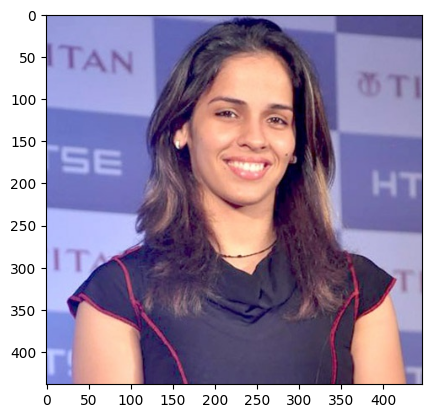

0-24 yrs old


In [ ]:

new_model = load_model('/content/drive/MyDrive/Rachana/model/accuracy_bestmodel.h5')

def loadImage(filepath):
  test_img = image.load_img(filepath, target_size=(198, 198))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

picture = "/content/drive/MyDrive/Rachana/Saina_Nehwal_21.jpeg"
age_pred = new_model.predict(loadImage(picture))
img = image.load_img(picture)
plt.imshow(img)
plt.show()
max=-1
count=0

for i in age_pred[0]:
  if i>max:
    max = i
    temp = count
  count+=1

if temp==0:
  print('0-24 yrs old')
if temp==1:
  print('25-49 yrs old')
if temp==2:
  print('50-74 yrs old')
if temp==3:
  print('75-99 yrs old')
if temp==4:
  print('91-124 yrs old')

